In [1]:
from causaleffect import *

In [2]:
'''Define G (example in section 3.3 of paper "Identifying Causal Effects with the R Package causaleffect")'''
G1 = createGraph(["X<->Y", "Z->Y", "X->Z", "W->X", "W->Z"])
#plotGraph(G1)

'''Define G2 (example Figure 1a of paper "Identification of Joint Interventional 
Distributions in Recursive Semi-Markovian Causal Models")'''
G2 = createGraph(["X->Y_1", "Y_2<->W_1", "W_1<->Y_1", "W_1->X", "W_2->Y_2", "W_2<->W_1", "X<->W_2"])
#plotGraph(G2)

'''Define G2b (example Figure 1b of paper "Identification of Joint Interventional 
Distributions in Recursive Semi-Markovian Causal Models")'''
G2b = G2.copy()
G2b.add_edges([(3,4)])
G2b.es[-1]["confounding"] = 0
#plotGraph(G2b)

'''Define G3a (example Figure 1a of paper "Identification of Conditional
Interventional Distributions")'''
G3a = createGraph(["X->Z", "X<->Z", "Z->Y"])
#plotGraph(G3a)

'''Define G3b (example Figure 1b of paper "Identification of Conditional
Interventional Distributions")'''
G3b = createGraph(["X->Z", "X<->Z", "Z<-Y"])
#plotGraph(G3b)

'''Define G3c (example Figure 1c of paper "Identification of Conditional
Interventional Distributions")'''
G3c = createGraph(["X->Z", "X<->Z", "Z<-Y", "W->Y"])
#plotGraph(G3c)

'''Define G7 (example Figure 7 of paper "Identifying Causal Effects with the R Package causaleffect")'''
G7 = createGraph(["X<->Y", "X->Z_1", "X<->Z_2", "X<-Z_2", "X<->Z_3", "Y<-Z_1", "Y<->Z_2", "Y<-Z_3", "Z_1<-Z_2", "Z_2->Z_3"])
#plotGraph(G7)

'''Define G8 (example Figure 8 of paper "Identifying Causal Effects with the R Package causaleffect")'''
G8 = createGraph(["X->Y", "W->Y", "Z->X", "Z->W"])
#plotGraph(G8)

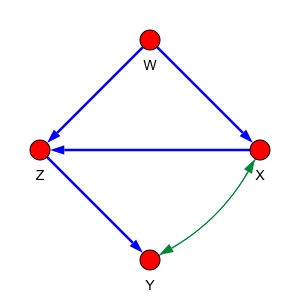

In [3]:
plotGraph(G1)

In [4]:
#expected input: ID({'Y'}, {'X'}, G1, verbose=False)
#expected output: \sum_{w, z}P(w)P(z|w, x)\\left(\sum_{x}P(x|w)P(y|w, x, z)\\right)
#------------------------------------------
#expected input: ID({'Y_1', 'Y_2'}, {'X'}, G2, verbose=False)
#expected output: \sum_{w_2}P(w_2)P(y_2|w_2)\\left(\sum_{w_1}P(w_1)P(y_1|w_1, x)\\right)
#------------------------------------------
#expected input: ID({'Y_1', 'Y_2'}, {'X'}, G2b, verbose=False)
#expected output: Hedge found
#------------------------------------------
#expected input: ID({'Y'}, {'X'}, G3a, cond={'Z'}, verbose=False)
#expected output: P(y|x, z)
#------------------------------------------
#expected input: ID({'Y'}, {'X'}, G3b, verbose=False)
#expected output: P(y)
#------------------------------------------
#expected input: ID({'W'}, {'X'}, G3c, cond = {'Z'}, verbose=False)
#expected output: Hedge found
#------------------------------------------
#expected input: ID({'Y', 'Z_1', 'Z_2', 'Z_3'}, {'X'}, G7, verbose=False)
#expected output: P(z_1|x, z_2)P(z_3|z_2)\left(\sum_{x, y, z_3}P(x|z_2)P(y|x, z_1, z_2, z_3)P(z_2)P(z_3|x, z_2)\right)\frac{\left(\sum_{x}P(x|z_2)P(y|x, z_1, z_2, z_3)P(z_2)P(z_3|x, z_2)\right)}{\sum_{x, y}P(x|z_2)P(y|x, z_1, z_2, z_3)P(z_2)P(z_3|x, z_2)}
#------------------------------------------
#expected input: ID({'Y'}, {'X', 'W'}, G8, verbose=False)
#expected output: P(y|w, x, z)
#------------------------------------------

Prob = ID({'Y'}, {'X', 'W'}, G8, verbose=False)

print(Prob.printLatex(simplify=True, complete_simplification=True))


P(y|w, x, z)
